In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import glob
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
cloudy=glob.glob('data/cloudy/*.jpg')
desert=glob.glob('data/desert/*.jpg')
green_area=glob.glob('data/green_area/*.jpg')
water=glob.glob('data/water/*.jpg')

In [4]:
image=[]
label=[]

for i in cloudy:
    img=plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in desert:
    img=plt.imread(i)
    image.append(img)
    label.append(1)
    
    
for i in green_area:
    img=plt.imread(i)
    image.append(img)
    label.append(2)

    
for i in water:
    img=plt.imread(i)
    image.append(img)
    label.append(3)
    

In [5]:
image,label=shuffle(image,label,random_state=100)

In [6]:
labels={0:'cloudy',1:'desert',2:'green_area',3:'water'}

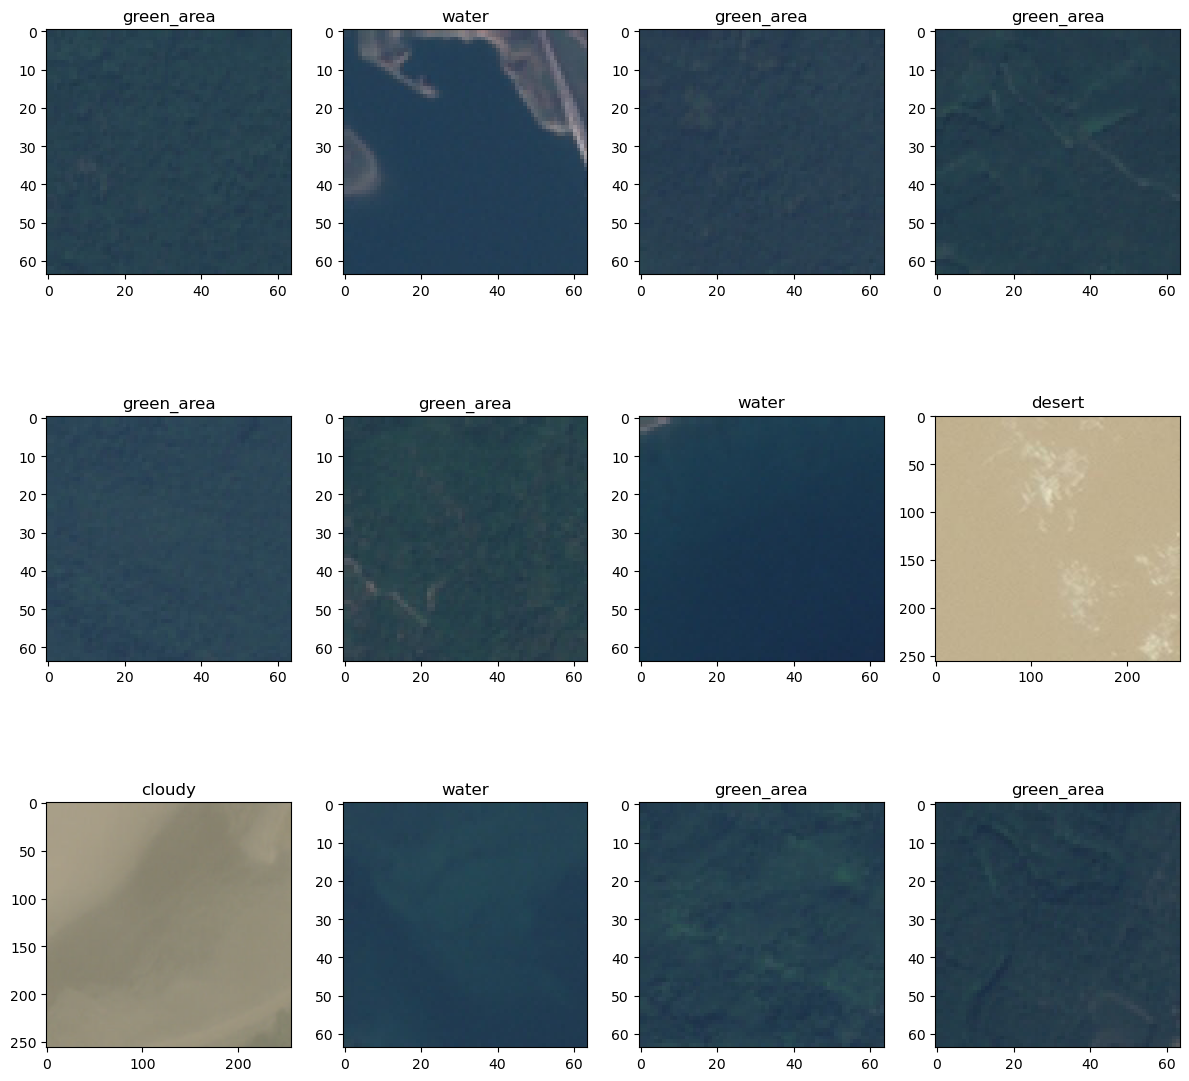

In [7]:
plt.figure(figsize=(12,12))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(labels[label[i]])
plt.tight_layout()

In [8]:
for i in range(10):
    print( image[i].shape)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 3)
(256, 256, 4)
(64, 64, 3)


In [9]:
X=[]
for i in image:
    X.append(resize(i,(224,224,3)))

In [10]:
X=np.array(X)
y=np.array(label)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(88, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 88)                1

In [15]:
model.fit(X_train,y_train,epochs=5,validation_split=0.5)

Epoch 1/5
38/38 [==============================] - 55s 1s/step - loss: 1.2851 - accuracy: 0.6227 - val_loss: 0.3379 - val_accuracy: 0.8010
Epoch 2/5
38/38 [==============================] - 44s 1s/step - loss: 0.3388 - accuracy: 0.8267 - val_loss: 0.2575 - val_accuracy: 0.8889
Epoch 3/5
38/38 [==============================] - 44s 1s/step - loss: 0.2993 - accuracy: 0.8748 - val_loss: 0.2662 - val_accuracy: 0.8624
Epoch 4/5
38/38 [==============================] - 42s 1s/step - loss: 0.2857 - accuracy: 0.8781 - val_loss: 0.3254 - val_accuracy: 0.8574
Epoch 5/5
38/38 [==============================] - 41s 1s/step - loss: 0.2361 - accuracy: 0.9022 - val_loss: 0.1682 - val_accuracy: 0.9295


In [16]:
model.evaluate(X_train,y_train)

76/76 [==============================] - 17s 217ms/step - loss: 0.1777 - accuracy: 0.9270


[0.1776781678199768, 0.9270315170288086]

In [17]:
y_pred=model.predict(X_test)

19/19 [==============================] - 5s 214ms/step


In [18]:
y_pred=[np.argmax(i) for i in y_pred]

In [19]:
accuracy_score(y_test,y_pred)

0.9336650082918739

<Axes: >

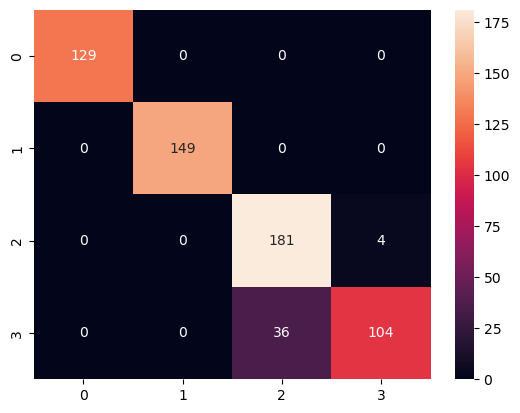

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       149
           2       0.83      0.98      0.90       185
           3       0.96      0.74      0.84       140

    accuracy                           0.93       603
   macro avg       0.95      0.93      0.93       603
weighted avg       0.94      0.93      0.93       603

